### FASHION MNIST CLASSIFICATION

In [4]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

======================Fetching and Getting the Data Ready for Training and Developing the Model=====================
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(55000, 28, 28)
(55000,)
(5000, 28, 28)
(5000,)
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

=========================Preprocess the Data=======================


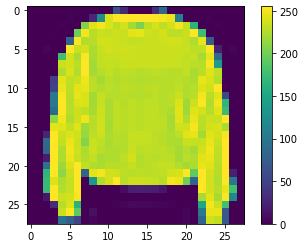

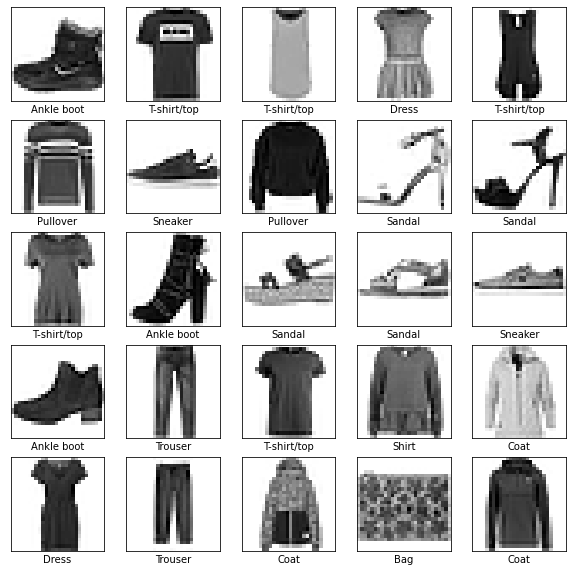


============================MODEL DEVELOPMENT===========================
===========================COMPILE THE MODEL===========================
===========================TRAIN THE MODEL==============================
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5008 - accuracy: 0.8235 - val_loss: 0.3974 - val_accuracy: 0.8606
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3740 - accuracy: 0.8651 - val_loss: 0.3383 - val_accuracy: 0.8773
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3375 - accuracy: 0.8770 - val_loss: 0.3311 - val_accuracy: 0.8808
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3114 - accuracy: 0.8857 - val_loss: 0.2810 - val_accuracy: 0.8966
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2934 - accuracy: 0.8929 - val_loss: 0.2782 - val_accuracy: 0.8970
Epoch 6/10
1875/1875 [==============================] - 5s 3m

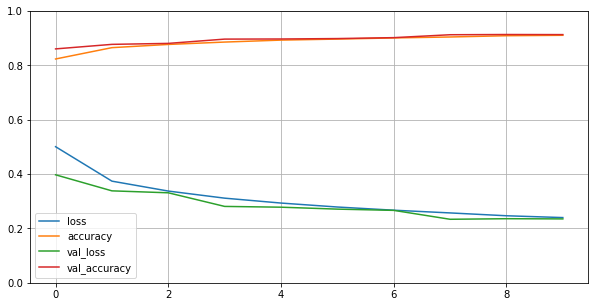

==========================EVALUATE THE MODEL=============================
313/313 - 0s - loss: 0.3483 - accuracy: 0.8793 - 350ms/epoch - 1ms/step

Test accuracy: 0.8792999982833862


In [57]:
## fetch the mnist data
print("======================Fetching and Getting the Data Ready for Training and Developing the Model=====================")
fashion_mnist = tf.keras.datasets.fashion_mnist
fashion_mnist
## tarin and test images and labels
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

train_validation_images = train_images[5000:]/255
print(train_validation_images.shape)
train_validation_labels = train_labels[5000:]
print(train_validation_labels.shape)

test_validation_images = test_images[:5000]/255
print(test_validation_images.shape)
test_validation_labels = test_labels[:5000]
print(test_validation_labels.shape)

## The images are 28x28 NumPy arrays
## pixel values ranging from 0 to 255
## labels are an array of integers, ranging from 0 to 9
## These correspond to the class of clothing the image represents
## classes = 0-->T-shirt/top,1-->Trouser,2-->Pullover,3-->Dress,4-->Coat,5-->Sandal,6-->Shirt,7-->Sneaker,8-->Bag,9-->Ankle boot
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names)
print()
print("=========================Preprocess the Data=======================")
## visualize the data point
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.grid(False)
plt.show()

## Scale these values to a range of 0 to 1 before feeding them to the neural network model
## divide the images by 255
train_images = train_images/255
test_images = test_images/255

## display the first 25 images from the training set and display the class name below each image
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

print()
print("============================MODEL DEVELOPMENT===========================")
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),   ## one hidden layer
    tf.keras.layers.Dense(10)
])

print("===========================COMPILE THE MODEL===========================")
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer = "adam",
             metrics = ["accuracy"])

print("===========================TRAIN THE MODEL==============================")
history = model.fit(train_images, train_labels, epochs=10, validation_data = (train_validation_images, train_validation_labels))  ## there is no validation data given here

## plotting the scores
pd.DataFrame(history.history).plot(figsize = (10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

print("==========================EVALUATE THE MODEL=============================")
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

In [66]:
print("==============================PREDICT THE MODEL===============================")
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
# probability_model
predictions = probability_model.predict(test_images)
# predictions
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])


==============================PREDICT THE MODEL===============================
313/313 [==============================] - 0s 1ms/step
[1.2421851e-09 1.3475906e-08 6.1841959e-10 8.4109469e-10 4.2107553e-09
 7.5662130e-04 9.0438401e-10 3.0470500e-03 2.6906767e-07 9.9619603e-01]
9
9


In [68]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

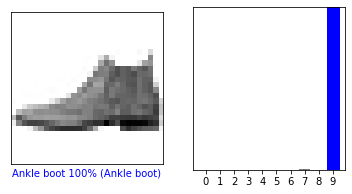

In [69]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

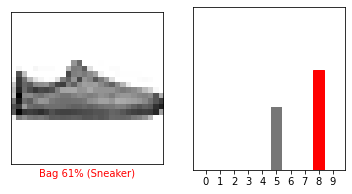

In [70]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

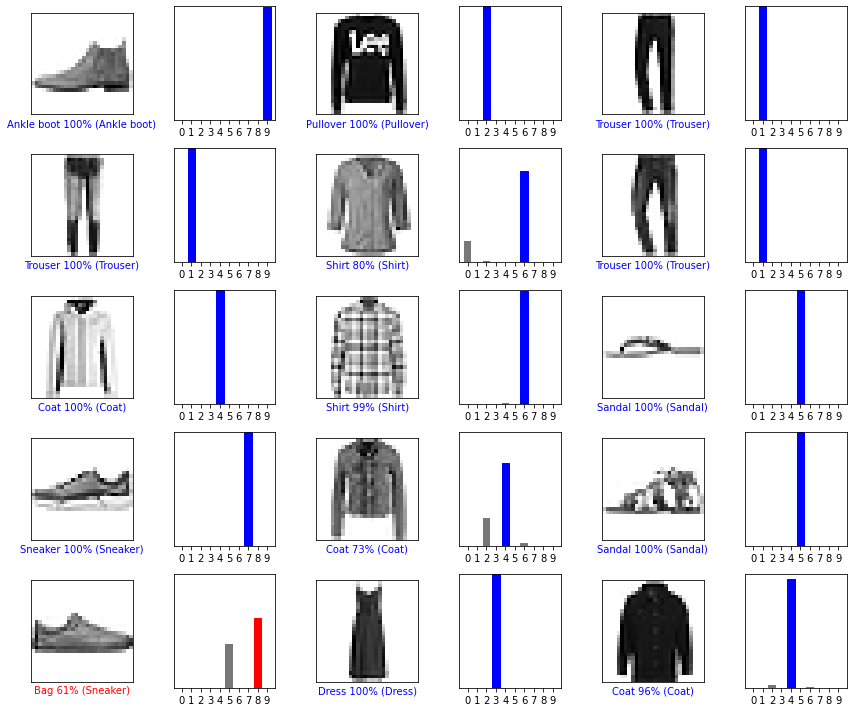

In [71]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 21ms/step
[[4.63822871e-05 1.15444573e-13 9.99786317e-01 4.81870266e-10
  1.20087898e-04 1.01165507e-10 4.71423627e-05 4.92064393e-18
  7.82725973e-09 1.43297147e-12]]


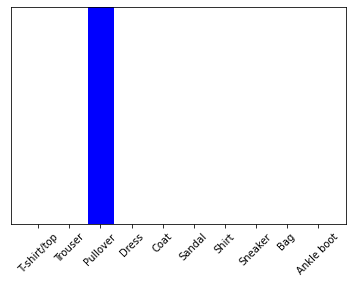

In [77]:
## use the trained model
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)
predictions_single = probability_model.predict(img)
print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [78]:
np.argmax(predictions_single[0])

2